Mounted at /content/drive/
class_id_0  class_id_1	MyDrive
['0019.jpg', '0018.jpg', '0017.jpg', '0016.jpg', '0015.jpg', '0014.jpg', '0013.jpg', '0012.jpg', '0011.jpg', '0010.jpg']
['0999.jpg', '0998.jpg', '0997.jpg', '0996.jpg', '0995.jpg', '0994.jpg', '0993.jpg', '0992.jpg', '0991.jpg', '0990.jpg']
Num samples class_0 10
Num samples class_1 10
Images (20, 28, 28)
Labels (20,)
Shape (20, 784)
Elapsed time 0.007908821105957031
Shape (20, 784)
Elapsed time 0.0016701221466064453
7842


ValueError: Only input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: 2 (of type <class 'str'>)

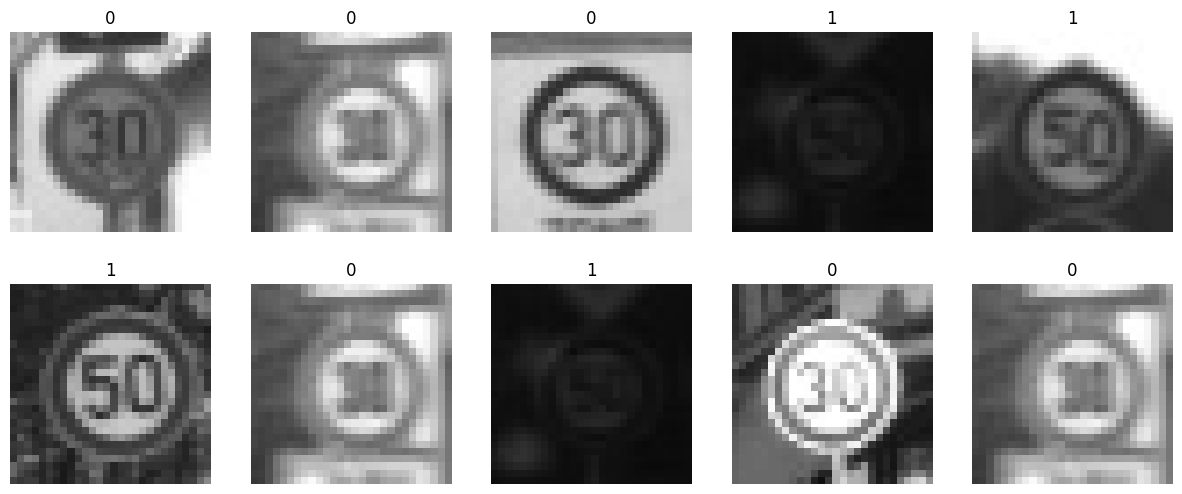

In [2]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle
from google.colab import drive

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

drive.mount("/content/drive/")
os.getcwd()
!mkdir MyDrive
!mount --bind /content/drive/My\ Drive /content/MyDrive

folder = os.chdir("/content/drive/MyDrive/data")
!ls
folder = '/content/drive/MyDrive/data'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
print(fnames_0)
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

# # Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
print(fnames_1)
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

start = time()
pixels = []
for image in images:
    pixels_ = []
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixels_.append(image[r,c])
    pixels.append(pixels_)

pixels = np.array(pixels)/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)


start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

shape=(pixels.shape[1])
inputs = input(shape)
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

model.compile(optimizer ='adam', loss = 'mean_squared_error')

history = model.fit(pixels, labels, epochs=10, batch_size=32)

# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())
